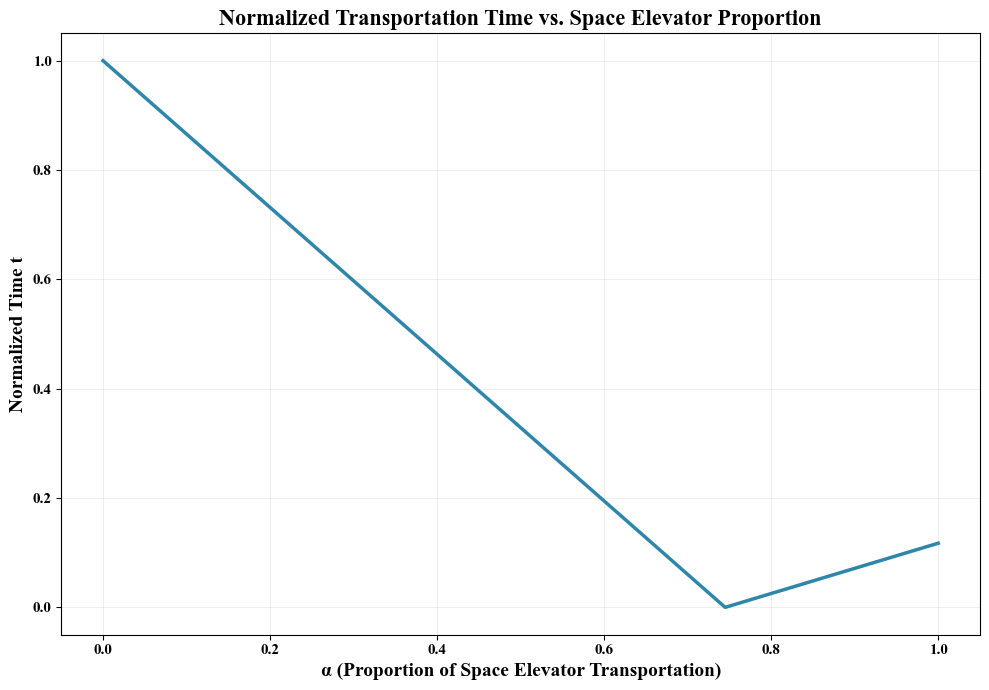

图1已保存: results/t_vs_alpha.png


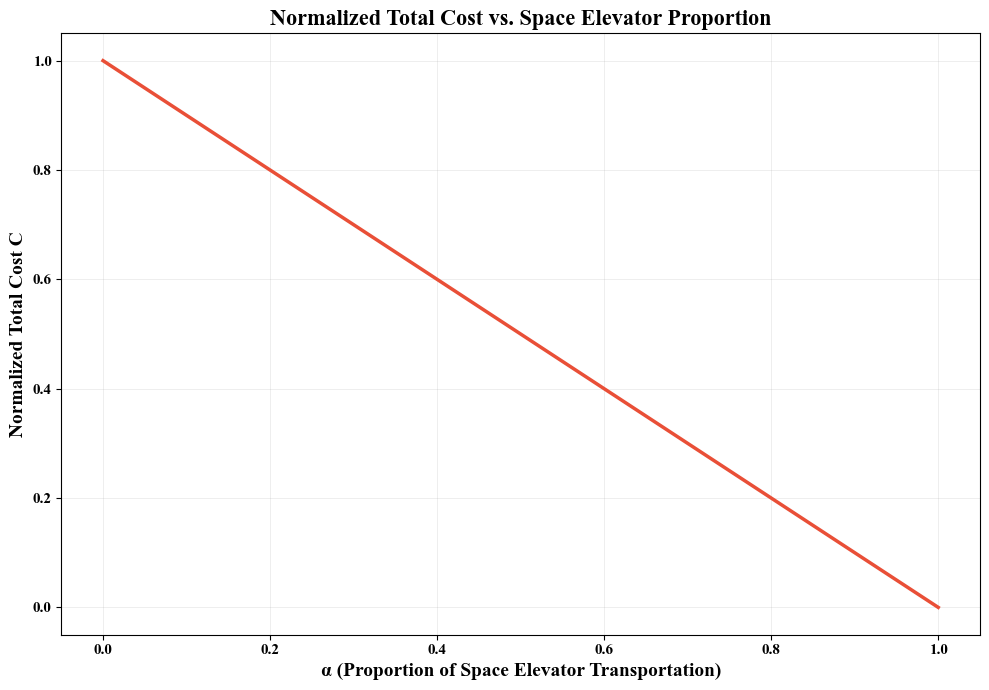

图2已保存: results/C_vs_alpha.png


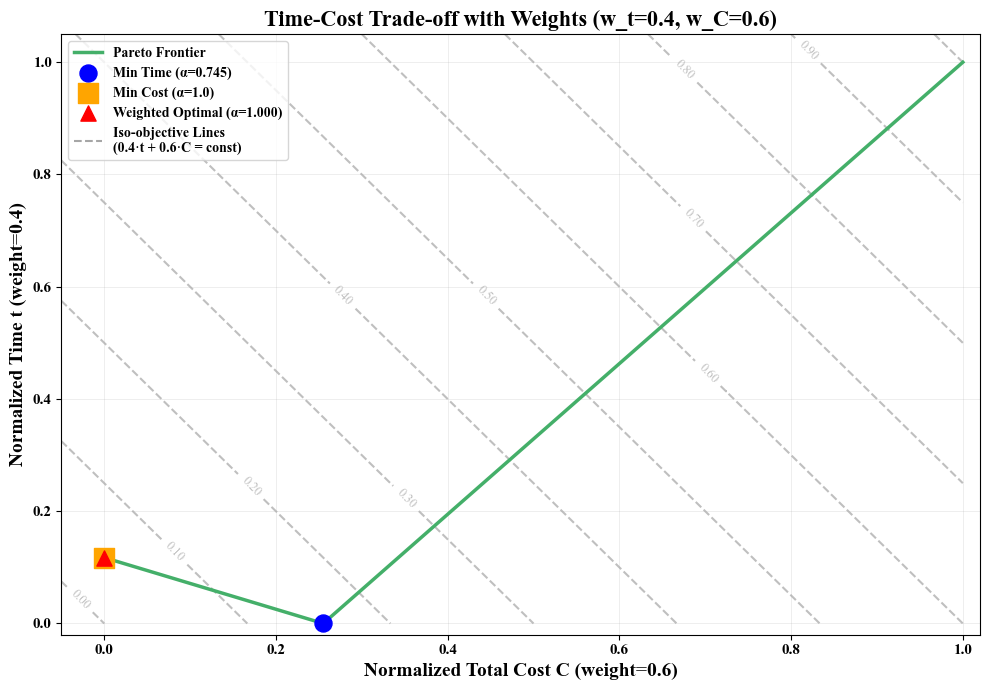

图3已保存: results/t_vs_C.png


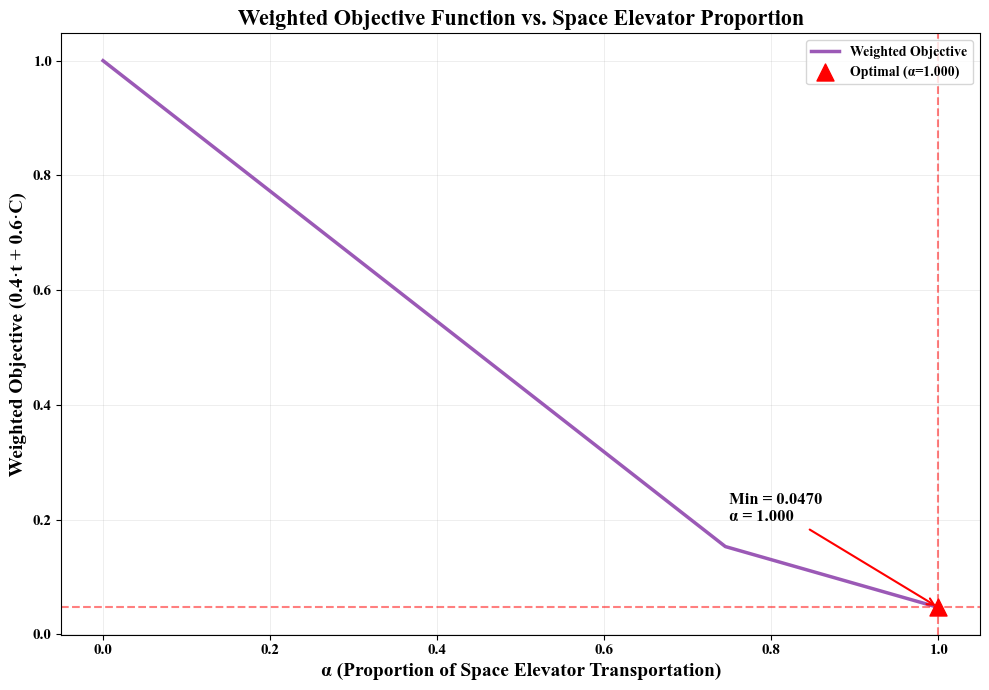

图4已保存: results/weighted_obj_vs_alpha.png

=== 加权优化分析 (w_t=0.4, w_C=0.6) ===
加权最优点: α = 1.0000
  - 时间 t = 186.22 年
  - 成本 C = 350.00 万亿USD
  - 加权目标值 = 0.0470

时间最优点: α = 0.7448
  - 时间 t = 138.70 年
  - 成本 C = 25780.69 万亿USD

成本最优点: α = 1.0
  - 时间 t = 186.22 年
  - 成本 C = 350.00 万亿USD


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
from matplotlib.lines import Line2D

# 设置全局字体
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman']
rcParams['axes.unicode_minus'] = False

M = 10**8                 #Total cargo volume (tons)
E_E = 179000 * 3          #Elevator annual cargo capacity (tons/year)
P_avg = 125               #Average payload capacity per rocket (tons/launch)
f_avg = 1472              #Average launch frequency (launches/year)
E_r = f_avg * P_avg       #Rocket annual cargo capacity (tons/year)
C_e1 = 2 * 10**6          #Marginal cost of Space Elevators transportation - Part1 (USD/ton)
C_e2 = 1.5 * 10**6        #Marginal cost of Space Elevators transportation - Part2 (USD/ton)
C_E = C_e1 + C_e2         #Marginal cost of Space Elevators transportation (USD/ton)
C_R = 10**9               #Rocket marginal cost (USD/ton)
F_R = 10**8               #Rocket fixed cost (USD/year)
F_E = 2 * 10**7           #Elevator fixed cost (USD/year)

# 权重设置
w_t = 0.4   # 时间权重
w_C = 0.6   # 成本权重

t = []
C = []
alpha_list = []

for a in range(0, 10001):
    alpha = a / 10000
    alpha_list.append(alpha)
    T1 = alpha * M / E_E
    T2 = (1 - alpha) * M / E_r
    T3 = max(T1, T2)
    t.append(T3)
    cost = alpha * M * C_E + (1 - alpha) * M * C_R + (1 - alpha) * F_R * T3 + alpha * F_E * T3
    C.append(cost)

# 转换为numpy数组
alpha_arr = np.array(alpha_list)
t_arr = np.array(t)
C_arr = np.array(C)

# 归一化到 [0, 1]
t_norm = (t_arr - t_arr.min()) / (t_arr.max() - t_arr.min())
C_norm = (C_arr - C_arr.min()) / (C_arr.max() - C_arr.min())

# 加权目标函数 (越小越好)
weighted_obj = w_t * t_norm + w_C * C_norm
optimal_idx = np.argmin(weighted_obj)

# ================== 图1: t(归一化) 关于 alpha 的关系 ==================
fig1, ax1 = plt.subplots(figsize=(10, 7))
ax1.plot(alpha_arr, t_norm, color='#2E86AB', linewidth=2.5)
ax1.set_xlabel('α (Proportion of Space Elevator Transportation)', fontsize=14, fontweight='bold', fontfamily='Times New Roman')
ax1.set_ylabel('Normalized Time t', fontsize=14, fontweight='bold', fontfamily='Times New Roman')
ax1.set_title('Normalized Transportation Time vs. Space Elevator Proportion', fontsize=16, fontweight='bold', fontfamily='Times New Roman')
ax1.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
ax1.tick_params(axis='both', labelsize=11)
for label in ax1.get_xticklabels() + ax1.get_yticklabels():
    label.set_fontname('Times New Roman')
    label.set_fontweight('bold')
plt.tight_layout()
fig1.savefig('../results/t_vs_alpha.png', dpi=300, bbox_inches='tight')
plt.show()
print('图1已保存: results/t_vs_alpha.png')

# ================== 图2: C(归一化) 关于 alpha 的关系 ==================
fig2, ax2 = plt.subplots(figsize=(10, 7))
ax2.plot(alpha_arr, C_norm, color='#E94F37', linewidth=2.5)
ax2.set_xlabel('α (Proportion of Space Elevator Transportation)', fontsize=14, fontweight='bold', fontfamily='Times New Roman')
ax2.set_ylabel('Normalized Total Cost C', fontsize=14, fontweight='bold', fontfamily='Times New Roman')
ax2.set_title('Normalized Total Cost vs. Space Elevator Proportion', fontsize=16, fontweight='bold', fontfamily='Times New Roman')
ax2.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)
ax2.tick_params(axis='both', labelsize=11)
for label in ax2.get_xticklabels() + ax2.get_yticklabels():
    label.set_fontname('Times New Roman')
    label.set_fontweight('bold')
plt.tight_layout()
fig2.savefig('../results/C_vs_alpha.png', dpi=300, bbox_inches='tight')
plt.show()
print('图2已保存: results/C_vs_alpha.png')

# ================== 图3: 加权 t-C 关系图 ==================
fig3, ax3 = plt.subplots(figsize=(10, 7))

# 绘制等值线（加权目标函数）- 先绘制，放在底层
C_grid, t_grid = np.meshgrid(np.linspace(-0.05, 1, 100), np.linspace(0, 1.05, 100))
Z = w_t * t_grid + w_C * C_grid
contour = ax3.contour(C_grid, t_grid, Z, levels=10, colors='gray', alpha=0.5, linestyles='--', zorder=1)
ax3.clabel(contour, inline=True, fontsize=9, fmt='%.2f')

# 绘制曲线
ax3.plot(C_norm, t_norm, color='#44AF69', linewidth=2.5, label='Pareto Frontier', zorder=2)

# 标注关键点
t_min_idx = np.argmin(t_arr)

# 1. 时间最优点（蓝圆）
ax3.scatter(C_norm[t_min_idx], t_norm[t_min_idx], s=150, c='blue', marker='o', zorder=10,
            label=f'Min Time (α={alpha_arr[t_min_idx]:.3f})')

# 2. 成本最优点（橙方）和加权最优点（红三角）- 都在y轴与绿线交点处重合
# 先绘制橙方（较大），再绘制红三角（较小，在上面）
ax3.scatter(C_norm[-1], t_norm[-1], s=200, c='orange', marker='s', zorder=11,
            label=f'Min Cost (α=1.0)')
ax3.scatter(C_norm[-1], t_norm[-1], s=120, c='red', marker='^', zorder=12,
            label=f'Weighted Optimal (α={alpha_arr[optimal_idx]:.3f})')

# 创建图例（包括等值线）
iso_line = Line2D([0], [0], color='gray', linestyle='--', linewidth=1.5, alpha=0.7,
                  label=f'Iso-objective Lines\n(0.4·t + 0.6·C = const)')

ax3.set_xlabel('Normalized Total Cost C (weight=0.6)', fontsize=14, fontweight='bold', fontfamily='Times New Roman')
ax3.set_ylabel('Normalized Time t (weight=0.4)', fontsize=14, fontweight='bold', fontfamily='Times New Roman')
ax3.set_title(f'Time-Cost Trade-off with Weights (w_t={w_t}, w_C={w_C})', fontsize=16, fontweight='bold', fontfamily='Times New Roman')
ax3.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)

# 设置坐标轴范围，确保边缘的标记点完整显示
ax3.set_xlim(-0.05, 1.02)
ax3.set_ylim(-0.02, 1.05)

# 获取所有handles和labels，添加等值线图例
handles, labels = ax3.get_legend_handles_labels()
handles.append(iso_line)
labels.append(f'Iso-objective Lines\n(0.4·t + 0.6·C = const)')
ax3.legend(handles=handles, labels=labels, fontsize=10, loc='upper left', 
           prop={'family': 'Times New Roman', 'weight': 'bold'})

ax3.tick_params(axis='both', labelsize=11)
for label in ax3.get_xticklabels() + ax3.get_yticklabels():
    label.set_fontname('Times New Roman')
    label.set_fontweight('bold')
plt.tight_layout()
fig3.savefig('../results/t_vs_C.png', dpi=300, bbox_inches='tight')
plt.show()
print('图3已保存: results/t_vs_C.png')

# ================== 图4: 加权目标函数 关于 alpha 的关系 ==================
fig4, ax4 = plt.subplots(figsize=(10, 7))
ax4.plot(alpha_arr, weighted_obj, color='#9B59B6', linewidth=2.5, label='Weighted Objective')
ax4.set_xlabel('α (Proportion of Space Elevator Transportation)', fontsize=14, fontweight='bold', fontfamily='Times New Roman')
ax4.set_ylabel('Weighted Objective (0.4·t + 0.6·C)', fontsize=14, fontweight='bold', fontfamily='Times New Roman')
ax4.set_title('Weighted Objective Function vs. Space Elevator Proportion', fontsize=16, fontweight='bold', fontfamily='Times New Roman')
ax4.grid(True, alpha=0.3, linestyle='-', linewidth=0.5)

# 标注最优点
ax4.scatter(alpha_arr[optimal_idx], weighted_obj[optimal_idx], s=150, c='red', marker='^', zorder=10,
            label=f'Optimal (α={alpha_arr[optimal_idx]:.3f})')
ax4.axvline(x=alpha_arr[optimal_idx], color='red', linestyle='--', alpha=0.5, linewidth=1.5)
ax4.axhline(y=weighted_obj[optimal_idx], color='red', linestyle='--', alpha=0.5, linewidth=1.5)

# 添加注释
ax4.annotate(f'Min = {weighted_obj[optimal_idx]:.4f}\nα = {alpha_arr[optimal_idx]:.3f}',
             xy=(alpha_arr[optimal_idx], weighted_obj[optimal_idx]),
             xytext=(alpha_arr[optimal_idx] - 0.25, weighted_obj[optimal_idx] + 0.15),
             fontsize=12, fontweight='bold', fontfamily='Times New Roman',
             arrowprops=dict(arrowstyle='->', color='red', lw=1.5))

ax4.legend(fontsize=11, loc='upper right', prop={'family': 'Times New Roman', 'weight': 'bold'})
ax4.tick_params(axis='both', labelsize=11)
for label in ax4.get_xticklabels() + ax4.get_yticklabels():
    label.set_fontname('Times New Roman')
    label.set_fontweight('bold')
plt.tight_layout()
fig4.savefig('../results/weighted_obj_vs_alpha.png', dpi=300, bbox_inches='tight')
plt.show()
print('图4已保存: results/weighted_obj_vs_alpha.png')

# 打印关键点分析
print(f"\n=== 加权优化分析 (w_t={w_t}, w_C={w_C}) ===")
print(f"加权最优点: α = {alpha_arr[optimal_idx]:.4f}")
print(f"  - 时间 t = {t_arr[optimal_idx]:.2f} 年")
print(f"  - 成本 C = {C_arr[optimal_idx]/1e12:.2f} 万亿USD")
print(f"  - 加权目标值 = {weighted_obj[optimal_idx]:.4f}")

print(f"\n时间最优点: α = {alpha_arr[t_min_idx]:.4f}")
print(f"  - 时间 t = {t_arr[t_min_idx]:.2f} 年")
print(f"  - 成本 C = {C_arr[t_min_idx]/1e12:.2f} 万亿USD")

print(f"\n成本最优点: α = 1.0")
print(f"  - 时间 t = {t_arr[-1]:.2f} 年")
print(f"  - 成本 C = {C_arr[-1]/1e12:.2f} 万亿USD")